In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open("data_HW2.csv", "r") as data:
    datos = data.readlines()
    data.close()
datos = [x.strip() for x in datos]
datos.pop(0)
datos

['-5.062680965586749959e-01,-4.256756647965772022e-01',
 '-9.744345294228942134e-01,7.742295262316751803e-01',
 '-9.204234103976232095e-01,4.501124122366629843e-01',
 '-4.164251044979083716e-03,-6.371111781295005771e-01',
 '8.860600429983311876e-01,4.029323677072521592e-01',
 '-7.416951700269247549e-01,-3.249095917698183178e-02',
 '6.130713154999112291e-01,-1.090313015082913783e-01',
 '-5.923206696592275833e-02,-3.926476120764466060e-01',
 '6.952090079013648616e-01,1.613453573706427613e-01',
 '2.774790329587701887e-01,-4.299971102309542159e-01',
 '-7.447727571225120080e-01,1.153858107755066642e-01',
 '-4.244934610173514145e-01,-2.139057781608896258e-01',
 '4.437033743799179142e-01,-6.248711306823234723e-02',
 '-9.719575775497384384e-01,5.200987729345255550e-01',
 '2.215065862683143205e-01,-4.682580074197810749e-01',
 '-8.547410398975407997e-01,5.916225254758372687e-01',
 '-6.053800526571604390e-01,-3.911088525428890045e-02',
 '-9.808727862786366103e-01,7.437853061783140651e-01',
 '-6.7

In [3]:
df_datos = pd.DataFrame(datos, columns=['Datos'])
df_datos

,Datos
0,"-5.062680965586749959e-01,-4.25675664796577202..."
1,"-9.744345294228942134e-01,7.742295262316751803..."
2,"-9.204234103976232095e-01,4.501124122366629843..."
3,"-4.164251044979083716e-03,-6.37111178129500577..."
4,"8.860600429983311876e-01,4.029323677072521592e-01"
...,...
995,"-1.804048627098466806e-01,-4.66099707057296530..."
996,"-8.441654608275948046e-01,2.037836395805847634..."
997,"7.846599218879062310e-01,3.404313313809324004e-01"
998,"4.541736818521582286e-01,4.630698550668388425e-03"


a) Considere la función f (x, y) = x sin(πy) + x2 + y2. Realice sus gráficos 3D y de contorno para (x, y) ∈ [−1, 1] ×[−1, 1]. Para este último muestre al menos 20 niveles. A primera vista, ¿cerca de qué puntos podemos encontrar mínimos locales?

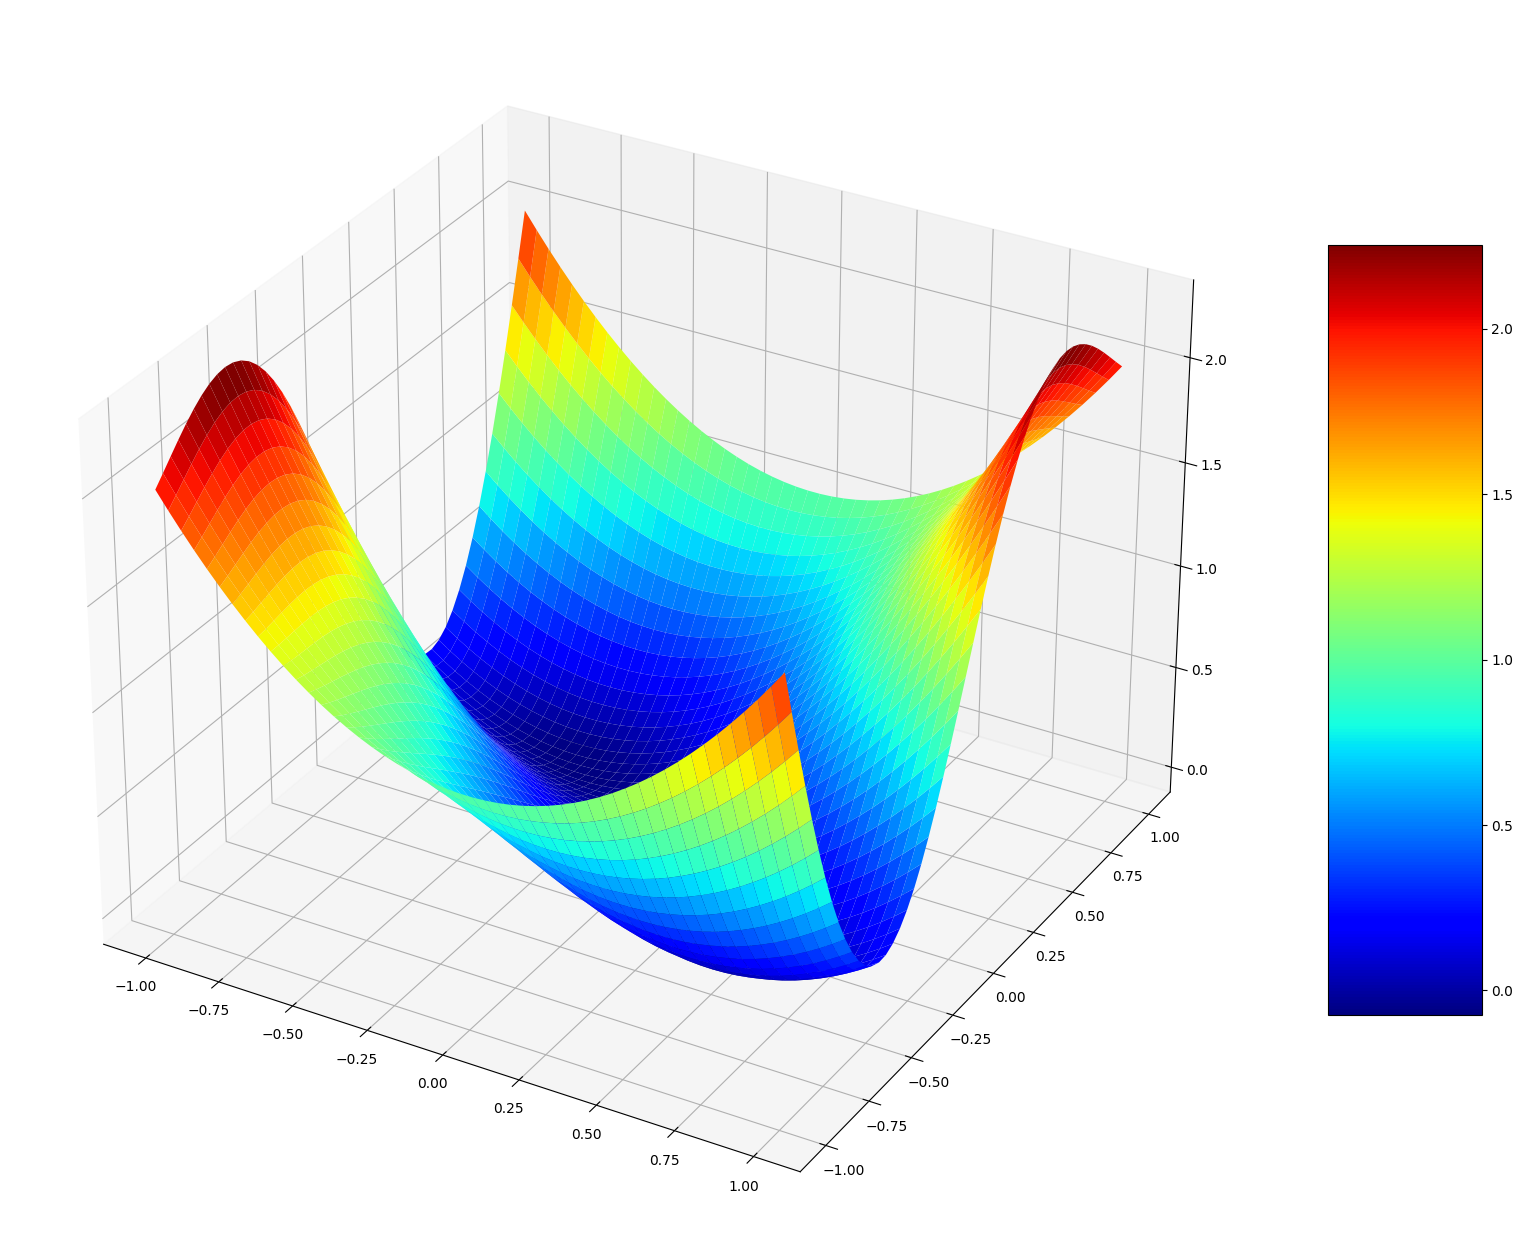

In [4]:
dom = np.linspace(-1, 1)
xx, yy = np.meshgrid(dom, dom)
f = lambda x, y: x*np.sin(np.pi*y)+x**2+y**2
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw={'projection': '3d'})
surf = ax.plot_surface(xx, yy, f(xx, yy), antialiased=True, cmap="jet")
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Utilizando la librería matplotlib y geogebra, al ojo se logra apreciar que el mínimo local es #Introducir mínimo local#

b) Programe el método de descenso de gradiente (Algoritmo 2) para la función f presentada anteriormente, con criterio de parada ‖xk+1 −xk‖2 ≤ 10^−12. Corra este algoritmo con puntos iniciales x0 = (1/2, −3/4)>^T, y x0 = (3/4, 0)>^T para tamaños de pasos ηk = 1/k para k ≥ 1. Reporte el número de pasos requeridos para cada punto inicial en alcanzar un mínimo local y grafique los puntos resultantes en el gráfico de contorno.

In [5]:
f = lambda x, y: x*np.sin(np.pi*y)+x**2+y**2

In [6]:
def gradiente_descendiente(x_k, epsilon = (10**(-12))):
    steps = [x_k]
    delta = 1
    k = 1
    while delta > epsilon:
        x_k1 = x_k - 1/k*(np.array([2*x_k[0]+np.sin(np.pi*x_k[1]), np.pi*x_k[0]*np.cos(np.pi*x_k[1])+2*x_k[1]]))
        delta = np.linalg.norm(x_k1 - x_k)
        x_k = x_k1
        k += 1
        steps.append(x_k)
    return k, x_k, steps

In [7]:
x_0 = np.array([1/2, -3/4])
pasos, x_k1, fxparcial = gradiente_descendiente(x_0)
print("El número de pasos es: ", pasos)
print("El mínimo se encuentra en: ", x_k1)
print("La gradiente es: ", np.array(fxparcial))

El número de pasos es:  86014
El mínimo se encuentra en:  [ 0.43534711 -0.33633012]
La gradiente es:  [[ 0.5        -0.75      ]
 [ 0.20710678  1.86072073]
 [ 0.21186472 -0.29467354]
 ...
 [ 0.43534711 -0.33633012]
 [ 0.43534711 -0.33633012]
 [ 0.43534711 -0.33633012]]


In [8]:
x_0_2 = np.transpose(np.array([3/4, 0]))
pasos_2, x_k1_2, fxparcial_2 = gradiente_descendiente(x_0_2)
print("El número de pasos es: ", pasos_2)
print("El mínimo se encuentra en: ", x_k1_2)
print("La gradiente es: ", np.array(fxparcial_2))

El número de pasos es:  140529
El mínimo se encuentra en:  [-0.43534708  0.33633011]
La gradiente es:  [[ 0.75        0.        ]
 [-0.75       -2.35619449]
 [ 0.44983608  0.51431737]
 ...
 [-0.43534708  0.33633011]
 [-0.43534708  0.33633011]
 [-0.43534708  0.33633011]]


Para el punto (1/2, -3/4) se realizaron un total de 86.014 pasos, mientras que para el punto (3/4, 0) se realizaron un total de 140.529 pasos.

# Graficamos:

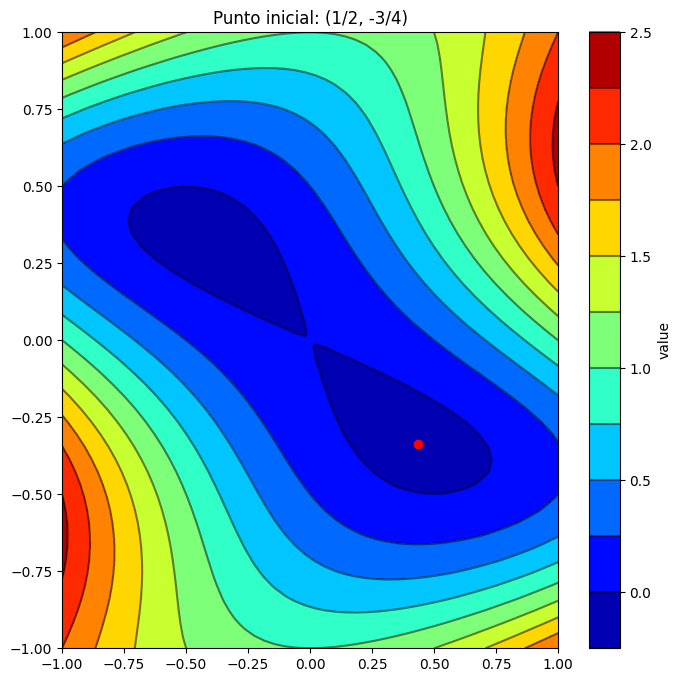

In [9]:
# Gráfico punto inicial (1/2, -3/4)

fig = plt.figure(figsize=(8, 8))
CS = plt.contourf(xx, yy, f(xx, yy), levels=10, cmap='jet')
cbar = fig.colorbar(CS, label='value')
CS2 = plt.contour(CS, levels=CS.levels[::1], colors='k', alpha=0.5)
cbar.add_lines(CS2)
plt.title('Punto inicial: (1/2, -3/4)')
plt.scatter(np.array(x_k1[0]), np.array(x_k1[1]), color='r', marker='o')
plt.show()

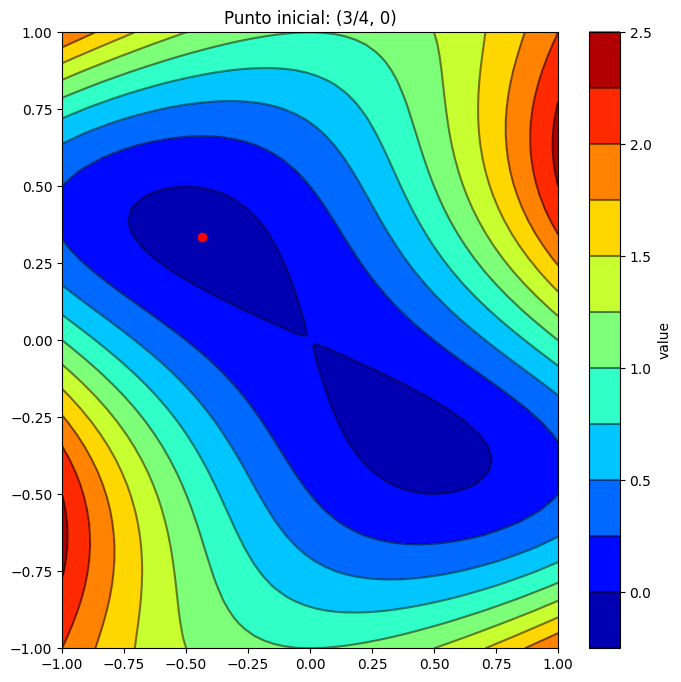

In [10]:
# Gráfico punto inicial (3/4, 0)

fig = plt.figure(figsize=(8, 8))
CS = plt.contourf(xx, yy, f(xx, yy), levels=10, cmap='jet')
cbar = fig.colorbar(CS, label='value')
CS2 = plt.contour(CS, levels=CS.levels[::1], colors='k', alpha=0.5)
cbar.add_lines(CS2)
plt.title('Punto inicial: (3/4, 0)')
plt.scatter(np.array(x_k1_2[0]), np.array(x_k1_2[1]), color='r', marker='o')
plt.show()

c) Considere la siguiente modificación al algoritmo presentado, para alpha perteneciente al intervalo [0,1]:

xk+1←xk−ηk∇f(xk) +α∆xk,∆xk:=xk−xk−1

desde la segunda iteración en adelante. Programe el algoritmo con esta modificación yreporte nuevamente todo lo de la pregunta anterior para un valor α = 0.5 y el mismo η_k utilizado anteriormente. ¿Cómo se comparan estos resultados con los obtenidos para el algoritmo clásico?

In [11]:
def gradiente_descendiente_variada(x_k, epsilon = (10**(-12))):
    contador = 1
    steps = [x_k]
    delta = 1
    k = 1
    alpha = 0.5
    while delta > epsilon:
        if contador == 2:
            x_k1 = x_k - 1/k*(np.array([2*x_k[0]+np.sin(np.pi*x_k[1]), np.pi*x_k[0]*np.cos(np.pi*x_k[1])+2*x_k[1]])) + alpha*(x_k - steps[-1])
            delta = np.linalg.norm(x_k1 - x_k)
            k += 1
            steps.append(x_k)
        else:
            x_k1 = x_k - 1/k*(np.array([2*x_k[0]+np.sin(np.pi*x_k[1]), np.pi*x_k[0]*np.cos(np.pi*x_k[1])+2*x_k[1]]))
            delta = np.linalg.norm(x_k1 - x_k)
            k += 1
            contador += 1
            steps.append(x_k1)
    return k, x_k, steps

In [12]:
x_0 = np.array([1/2, -3/4])
pasos, x_k1, fxparcial = gradiente_descendiente_variada(x_0)
print("El número de pasos es: ", pasos)
print("El mínimo se encuentra en: ", x_k1)
print("La gradiente es: ", np.array(fxparcial))

El número de pasos es:  3
El mínimo se encuentra en:  [ 0.5  -0.75]
La gradiente es:  [[ 0.5        -0.75      ]
 [ 0.20710678  1.86072073]
 [ 0.5        -0.75      ]]


In [13]:
x_0_2 = np.transpose(np.array([3/4, 0]))
pasos_2, x_k1_2, fxparcial_2 = gradiente_descendiente_variada(x_0_2)
print("El número de pasos es: ", pasos_2)
print("El mínimo se encuentra en: ", x_k1_2)
print("La gradiente es: ", np.array(fxparcial_2))

El número de pasos es:  3
El mínimo se encuentra en:  [0.75 0.  ]
La gradiente es:  [[ 0.75        0.        ]
 [-0.75       -2.35619449]
 [ 0.75        0.        ]]


Para esta ocación, aplicando la variación al algoritmo presentado, se obtuvo un total de 3 pasos tanto para el punto (1/2, -3/4), como para el punto (3/4, 0). Se puede apreciar que el algoritmo modificado es mucho más eficiente que el algoritmo clásico, ya que se obtienen resultados en un menor número de pasos.

# Graficamos:

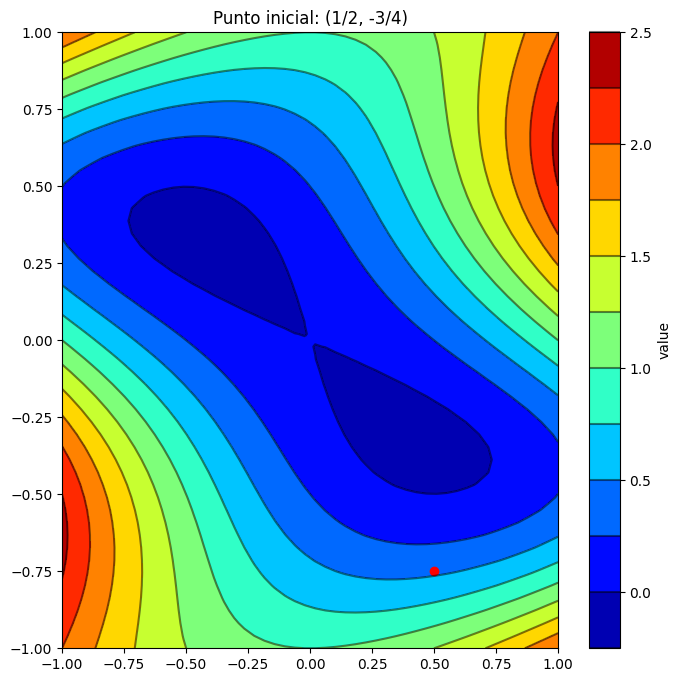

In [14]:
# Gráfico punto inicial (1/2, -3/4)

fig = plt.figure(figsize=(8, 8))
CS = plt.contourf(xx, yy, f(xx, yy), levels=10, cmap='jet')
cbar = fig.colorbar(CS, label='value')
CS2 = plt.contour(CS, levels=CS.levels[::1], colors='k', alpha=0.5)
cbar.add_lines(CS2)
plt.title('Punto inicial: (1/2, -3/4)')
plt.scatter(np.array(x_k1[0]), np.array(x_k1[1]), color='r', marker='o')
plt.show()

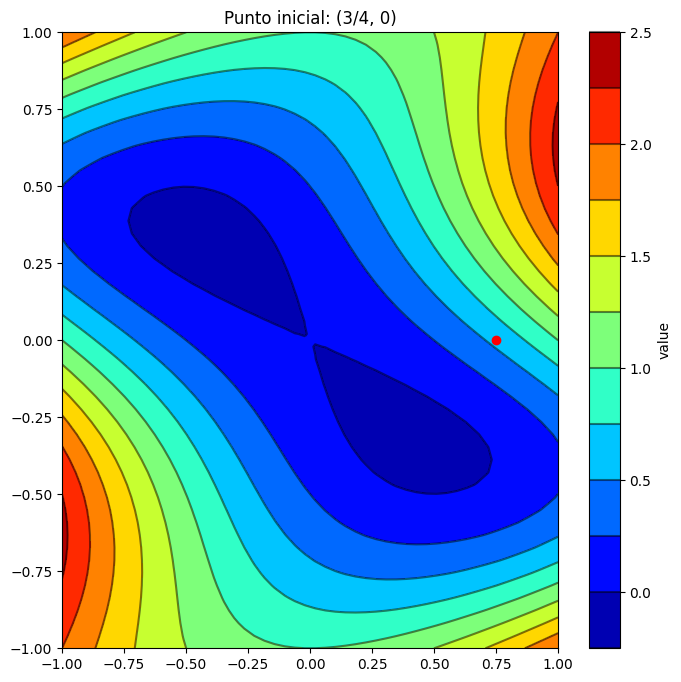

In [15]:
# Gráfico punto inicial (3/4, 0)

fig = plt.figure(figsize=(8, 8))
CS = plt.contourf(xx, yy, f(xx, yy), levels=10, cmap='jet')
cbar = fig.colorbar(CS, label='value')
CS2 = plt.contour(CS, levels=CS.levels[::1], colors='k', alpha=0.5)
cbar.add_lines(CS2)
plt.title('Punto inicial: (3/4, 0)')
plt.scatter(np.array(x_k1_2[0]), np.array(x_k1_2[1]), color='r', marker='o')
plt.show()

d) Descenso de gradiente estocástico:

1. Implementamos la función 'L' que calcula el valor de pérdida para un punto (x,y) y un valor de theta.

In [16]:
# theta = (a, b, c)
# vector = (x, y)
def L(theta, vector):
    return (theta[0]*vector[0]**2 + theta[1]*vector[0] + theta[2]-vector[1])**2

In [17]:
def descenso_de_gradiente_estocastico(teta_0: np.array, datos_2: np.array):
    historial_theta = [L(theta_k, datos_2[k])]
    theta_k = teta_0
    for k in range(len(datos_2)):
        theta_k_1 = theta_k - 1/k * (np.array([2*datos_2[k][0]**2*(theta_k[0]*datos_2[k][0]**2 + theta_k[1]*datos_2[k][0] + theta_k[2] - datos_2[k][1]), 2*datos_2[k][0]*(theta_k[0]*datos_2[k][0]**2 + theta_k[1]*datos_2[k][0] + theta_k[2] - datos_2[k][1]), 2*(theta_k[0]*datos_2[k][0]**2 + theta_k[1]*datos_2[k][0] + theta_k[2] - datos_2[k][1])]))
        l = L(theta_k_1, datos_2[k])
        historial_theta.append(l)
    return theta_k_1, historial_theta

In [18]:
vector_theta, historial_theta = descenso_de_gradiente_estocastico()

TypeError: descenso_de_gradiente_estocastico() missing 2 required positional arguments: 'teta_0' and 'datos_2'